In [75]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [76]:
datingApp = pd.read_csv('datingAppNor.csv')

In [77]:
datingApp

,Name,Review,Rating,Year,App,cleaned_review
0,Brett Wallace,SJW app that stole from tinder. Their way of f...,1,2018,Bumble,sjw app that stole from tinder their way of fi...
1,binidh gupta,No match untill u buy premium ...,1,2019,Bumble,no match untill u buy premium
2,Sealdory,It deleted my profile saying I am under 18 eve...,1,2021,Bumble,it deleted my profile saying i am under 18 eve...
3,Yomi O,"Bugs on bugs. I matched it a girl, we were cha...",1,2016,Bumble,bugs on bugs i matched it a girl we were chatt...
4,Avik Pal,Even in premium very few mathches and people d...,1,2021,Bumble,even in premium very few mathches and people d...
...,...,...,...,...,...,...
157891,U-Seven Tovar,Easy to use!,5,2016,Tinder,easy to use
157892,Naeem Sahil,Nice app,5,2022,Tinder,nice app
157893,Caroline Gitonga,"Great,I love it",5,2021,Tinder,greati love it
157894,Jack dd,Great app for meeting people and so on..cheeky...,5,2019,Tinder,great app for meeting people and so oncheeky s...


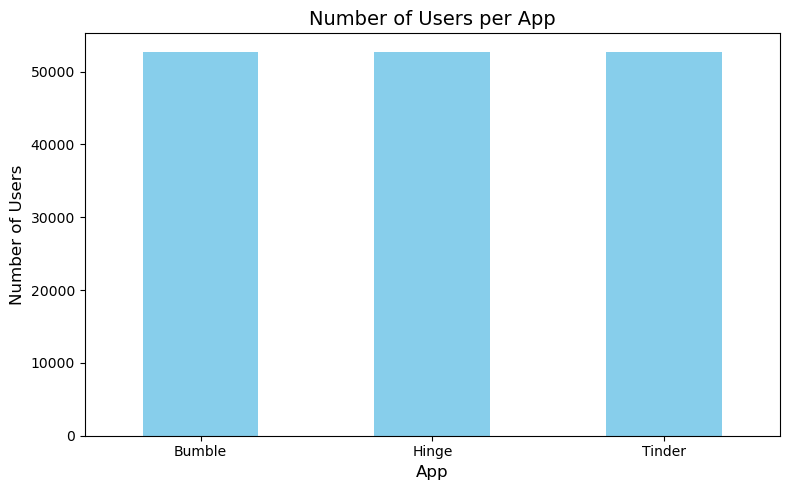

In [78]:
user_counts = datingApp['App'].value_counts()

# Plot the bar chart
user_counts.plot(kind="bar", figsize=(8, 5), color="skyblue")

# Add titles and labels
plt.title("Number of Users per App", fontsize=14)
plt.xlabel("App", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.xticks(rotation=0)

# Display the plot
plt.tight_layout()
plt.show()

Rating      1     2     3     4      5
App                                   
Bumble  15906  4507  5276  8584  18359
Hinge   15906  4507  5276  8584  18359
Tinder  15906  4507  5276  8584  18359


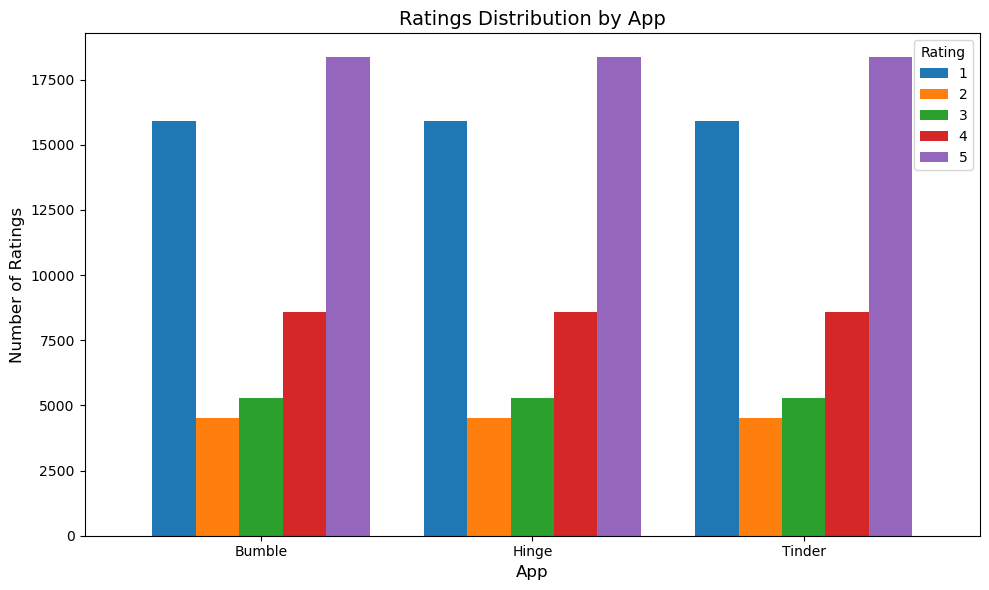

In [79]:
ratings_by_app = datingApp.groupby(['App', 'Rating']).size().unstack(fill_value=0)
print(ratings_by_app)
ratings_by_app.plot(kind="bar", figsize=(10, 6), width=0.8)

# Add titles and labels
plt.title("Ratings Distribution by App", fontsize=14)
plt.xlabel("App", fontsize=12)
plt.ylabel("Number of Ratings", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Rating", loc="upper right")

# Display the plot
plt.tight_layout()
plt.show()

# Vader Model

In [80]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/saujanyasriprakash/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [81]:
sia=SentimentIntensityAnalyzer()

In [82]:
print(sia.polarity_scores('I am so dissatisfied!'))
print(sia.polarity_scores('I am here!'))
print(sia.polarity_scores('this is incredible'))

{'neg': 0.614, 'neu': 0.386, 'pos': 0.0, 'compound': -0.4914}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [83]:
#Run the polarity score on the reviews and see if the review matches the rating
sia.polarity_scores(datingApp['cleaned_review'][157808])

{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'compound': 0.4215}

In [84]:
print(datingApp['cleaned_review'][157808], datingApp['Rating'][157808])

nice app 5


In [85]:
datingApp.dtypes

Name              object
Review            object
Rating             int64
Year               int64
App               object
cleaned_review    object
dtype: object

In [86]:
datingApp.shape

(157896, 6)

In [87]:
datingApp.isna().sum()

Name              0
Review            0
Rating            0
Year              0
App               0
cleaned_review    0
dtype: int64

In [88]:
# Ensure text is a string and handle missing/invalid values
def get_compound_score(text): 
    return sia.polarity_scores(text)['compound']
datingApp['sentiment_score'] = datingApp['cleaned_review'].apply(get_compound_score)
print(datingApp[['cleaned_review', 'sentiment_score']].head())

                                      cleaned_review  sentiment_score
0  sjw app that stole from tinder their way of fi...          -0.2229
1                      no match untill u buy premium          -0.2960
2  it deleted my profile saying i am under 18 eve...           0.0000
3  bugs on bugs i matched it a girl we were chatt...          -0.5574
4  even in premium very few mathches and people d...          -0.7184


In [89]:
datingApp.head()

,Name,Review,Rating,Year,App,cleaned_review,sentiment_score
0,Brett Wallace,SJW app that stole from tinder. Their way of f...,1,2018,Bumble,sjw app that stole from tinder their way of fi...,-0.2229
1,binidh gupta,No match untill u buy premium ...,1,2019,Bumble,no match untill u buy premium,-0.2960
2,Sealdory,It deleted my profile saying I am under 18 eve...,1,2021,Bumble,it deleted my profile saying i am under 18 eve...,0.0000
3,Yomi O,"Bugs on bugs. I matched it a girl, we were cha...",1,2016,Bumble,bugs on bugs i matched it a girl we were chatt...,-0.5574
4,Avik Pal,Even in premium very few mathches and people d...,1,2021,Bumble,even in premium very few mathches and people d...,-0.7184


In [90]:
print(datingApp['cleaned_review'][15], datingApp['Rating'][15], datingApp['sentiment_score'][15])

where are the people of color every guy looks exactly the same every account looks fake wheres the variety 1 -0.4767


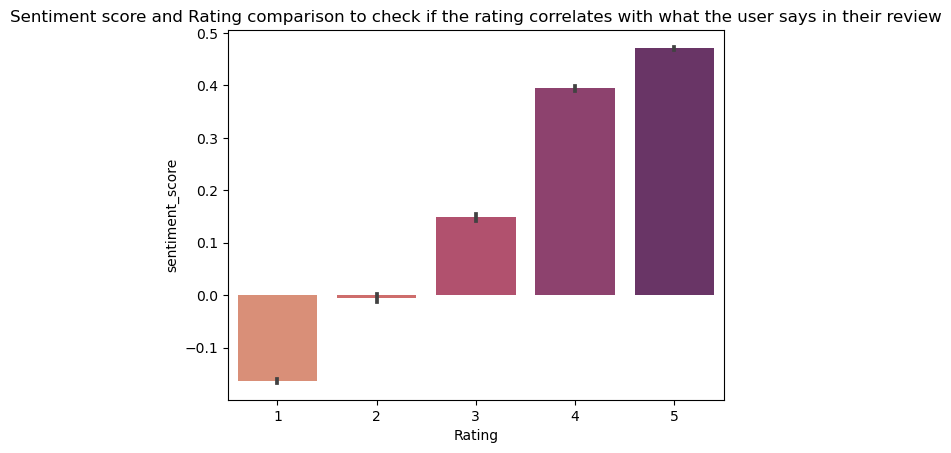

In [91]:
ax=sns.barplot(data=datingApp, x='Rating', y='sentiment_score', palette='flare')
ax.set_title('Sentiment score and Rating comparison to check if the rating correlates with what the user says in their review')
plt.show()

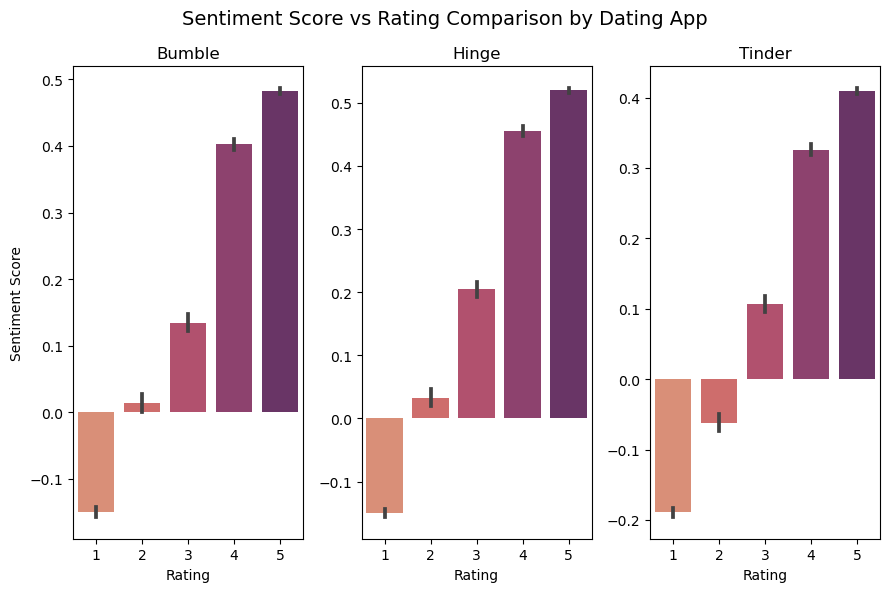

In [92]:
# Create a figure with 3 subplots, one for each app
fig, axes = plt.subplots(1, 3, figsize=(9, 6))
fig.suptitle('Sentiment Score vs Rating Comparison by Dating App', fontsize=14)

# Get unique apps
apps = datingApp['App'].unique()

# Create a plot for each app
for i, app in enumerate(apps):
    app_data = datingApp[datingApp['App'] == app]
    
    sns.barplot(data=app_data, x='Rating', y='sentiment_score', ax=axes[i], palette='flare')
    axes[i].set_title(f'{app}')
    axes[i].set_xlabel('Rating')
    axes[i].set_ylabel('Sentiment Score' if i == 0 else '')  # Only show y-label for first plot

plt.tight_layout()
plt.show()

# RoBERTa Pretrained Model

Vader model does not pickup on relationship b/w words (eg: sarcasm etc). The Roberta Model helps in correlation that

In [93]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [94]:
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [95]:
print(datingApp.iloc[4456], '\n', datingApp.iloc[5377], '\n', datingApp.iloc[4])

Name                                               Chowdary Chowdary
Review             Once selection of to show only women after tha...
Rating                                                             1
Year                                                            2021
App                                                           Bumble
cleaned_review     once selection of to show only women after tha...
sentiment_score                                               0.4939
Name: 4456, dtype: object 
 Name                chitty bang bang
Review             Ehhh kinda sexist
Rating                             1
Year                            2020
App                           Bumble
cleaned_review     ehhh kinda sexist
sentiment_score                  0.0
Name: 5377, dtype: object 
 Name                                                        Avik Pal
Review             Even in premium very few mathches and people d...
Rating                                                          

In [96]:
def roberta_scores(example):
    texts=tokenizer(example, return_tensors='pt')
    op=model(**texts)
    scores=op[0][0].detach().numpy()
    scores=softmax(scores)
    scores
    scores_dict={
        'neg':scores[0],
        'neutral':scores[1],
        'pos':scores[2]
    }

    return(scores_dict)

In [97]:
roberta_scores('It is not a bad app')

{'neg': 0.015640927, 'neutral': 0.13030013, 'pos': 0.8540589}

In [98]:
# Define the function to calculate RoBERTa scores for a single text input
def roberta_scores(example):
    # Tokenize the input text with truncation and padding
    texts = tokenizer(example, return_tensors='pt', truncation=True, padding=True, max_length=512)
    op = model(**texts)
    scores = op[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'R_neg': scores[0],
        'R_neu': scores[1],
        'R_pos': scores[2]
    }
    return scores_dict

# Apply the function to the 'cleaned_review' column
datingApp['Scores'] = datingApp['cleaned_review'].apply(roberta_scores)

# Expand the dictionary columns into separate columns
datingApp[['R_neg', 'R_neu', 'R_pos']] = datingApp['Scores'].apply(pd.Series)

# Drop the intermediate 'Scores' column if not needed
datingApp.drop(columns=['Scores'], inplace=True)

# View the updated DataFrame
datingApp

,Name,Review,Rating,Year,App,cleaned_review,sentiment_score,R_neg,R_neu,R_pos
0,Brett Wallace,SJW app that stole from tinder. Their way of f...,1,2018,Bumble,sjw app that stole from tinder their way of fi...,-0.2229,0.923939,0.071833,0.004228
1,binidh gupta,No match untill u buy premium ...,1,2019,Bumble,no match untill u buy premium,-0.2960,0.243902,0.693450,0.062648
2,Sealdory,It deleted my profile saying I am under 18 eve...,1,2021,Bumble,it deleted my profile saying i am under 18 eve...,0.0000,0.439008,0.532371,0.028621
3,Yomi O,"Bugs on bugs. I matched it a girl, we were cha...",1,2016,Bumble,bugs on bugs i matched it a girl we were chatt...,-0.5574,0.797363,0.188475,0.014162
4,Avik Pal,Even in premium very few mathches and people d...,1,2021,Bumble,even in premium very few mathches and people d...,-0.7184,0.916284,0.078000,0.005717
...,...,...,...,...,...,...,...,...,...,...
157891,U-Seven Tovar,Easy to use!,5,2016,Tinder,easy to use,0.4404,0.022150,0.258366,0.719483
157892,Naeem Sahil,Nice app,5,2022,Tinder,nice app,0.4215,0.010883,0.083239,0.905878
157893,Caroline Gitonga,"Great,I love it",5,2021,Tinder,greati love it,0.6369,0.007187,0.023771,0.969041
157894,Jack dd,Great app for meeting people and so on..cheeky...,5,2019,Tinder,great app for meeting people and so oncheeky s...,0.7832,0.001981,0.014040,0.983979


In [99]:
datingApp

,Name,Review,Rating,Year,App,cleaned_review,sentiment_score,R_neg,R_neu,R_pos
0,Brett Wallace,SJW app that stole from tinder. Their way of f...,1,2018,Bumble,sjw app that stole from tinder their way of fi...,-0.2229,0.923939,0.071833,0.004228
1,binidh gupta,No match untill u buy premium ...,1,2019,Bumble,no match untill u buy premium,-0.2960,0.243902,0.693450,0.062648
2,Sealdory,It deleted my profile saying I am under 18 eve...,1,2021,Bumble,it deleted my profile saying i am under 18 eve...,0.0000,0.439008,0.532371,0.028621
3,Yomi O,"Bugs on bugs. I matched it a girl, we were cha...",1,2016,Bumble,bugs on bugs i matched it a girl we were chatt...,-0.5574,0.797363,0.188475,0.014162
4,Avik Pal,Even in premium very few mathches and people d...,1,2021,Bumble,even in premium very few mathches and people d...,-0.7184,0.916284,0.078000,0.005717
...,...,...,...,...,...,...,...,...,...,...
157891,U-Seven Tovar,Easy to use!,5,2016,Tinder,easy to use,0.4404,0.022150,0.258366,0.719483
157892,Naeem Sahil,Nice app,5,2022,Tinder,nice app,0.4215,0.010883,0.083239,0.905878
157893,Caroline Gitonga,"Great,I love it",5,2021,Tinder,greati love it,0.6369,0.007187,0.023771,0.969041
157894,Jack dd,Great app for meeting people and so on..cheeky...,5,2019,Tinder,great app for meeting people and so oncheeky s...,0.7832,0.001981,0.014040,0.983979


In [100]:
datingApp.to_csv('datingAppScoresValues.csv', index=False)